# Using AWS Rekognition to recognise faces

### TODO : Set your bucket name here

In [26]:
bucket_name = 'applied-ai-20180924150202'
image_path = '../lfw'

### Imports

In [27]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append('../') 

import random
import pandas
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

from utils import show_side_by_side, load_image_as_array
from aws_rekognition import train, test

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Create an array of images from our dataset

Create 2 arrays, X and y, containing our training data.  In machine learning terminology, X is the data (in our case the file path for the images) and y is the labels. For this example, we'll use a mix of images of David Beckham and Serena Williams from the LFW dataset.

In [28]:
X = []
y = []
names = ['david_beckham', 'serena_williams']
for name in names:
    for image in os.listdir(os.path.join(image_path, name)):
        filename = os.path.join(image_path, name, image) 
        X.append(filename)
        y.append(name)
X = np.array(X)
y = np.array(y)

In [29]:
y

array(['david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham',
       'serena_williams', 'serena_williams', 'serena_williams',
       'serena_williams', 'serena_williams', 'serena_williams',
       'serena_williams', 'serena_williams', 'serena_williams',
       'serena_williams', 'serena_williams', 'serena_williams',
       'serena_williams', 'serena_williams', 'serena_williams',
       'serena_williams', 'serena_williams', 'serena_williams',
       'serena_williams', 'serena

In [31]:
# def show_side_by_side(images:list, cmap:str='gray', figsize:tuple=None, labels:list=[])->None:
#     """Pass a list of images to display them side by side"""
#     fig, axes = plt.subplots(ncols=len(images), nrows=1)
    
#     if figsize:
#         fig.set_size_inches(*figsize)
        
#     for i, im in enumerate(images):
#         axes[i].imshow(im, cmap=cmap)
#         axes[i].set_xticks([])
#         axes[i].set_yticks([])
        
#     if len(labels) > 0:
#         for i, label in enumerate(labels):
#             axes[i].set_title(label)
    
#     plt.tight_layout()
    
# def load_image_as_array(path:str)->np.ndarray:
#     """Load image from disk into numpy array"""
#     img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
#     return img

def get_samples(X, y, num_samples=5):
    samples = [random.randint(0, len(X) - 1) for i in range(num_samples)]
    images = [load_image_as_array(image) for image in (X[samples])]
    labels = y[samples]
    return images, labels

### Let's look at a sample of the images
Create an index of 5 sample images to see what we have

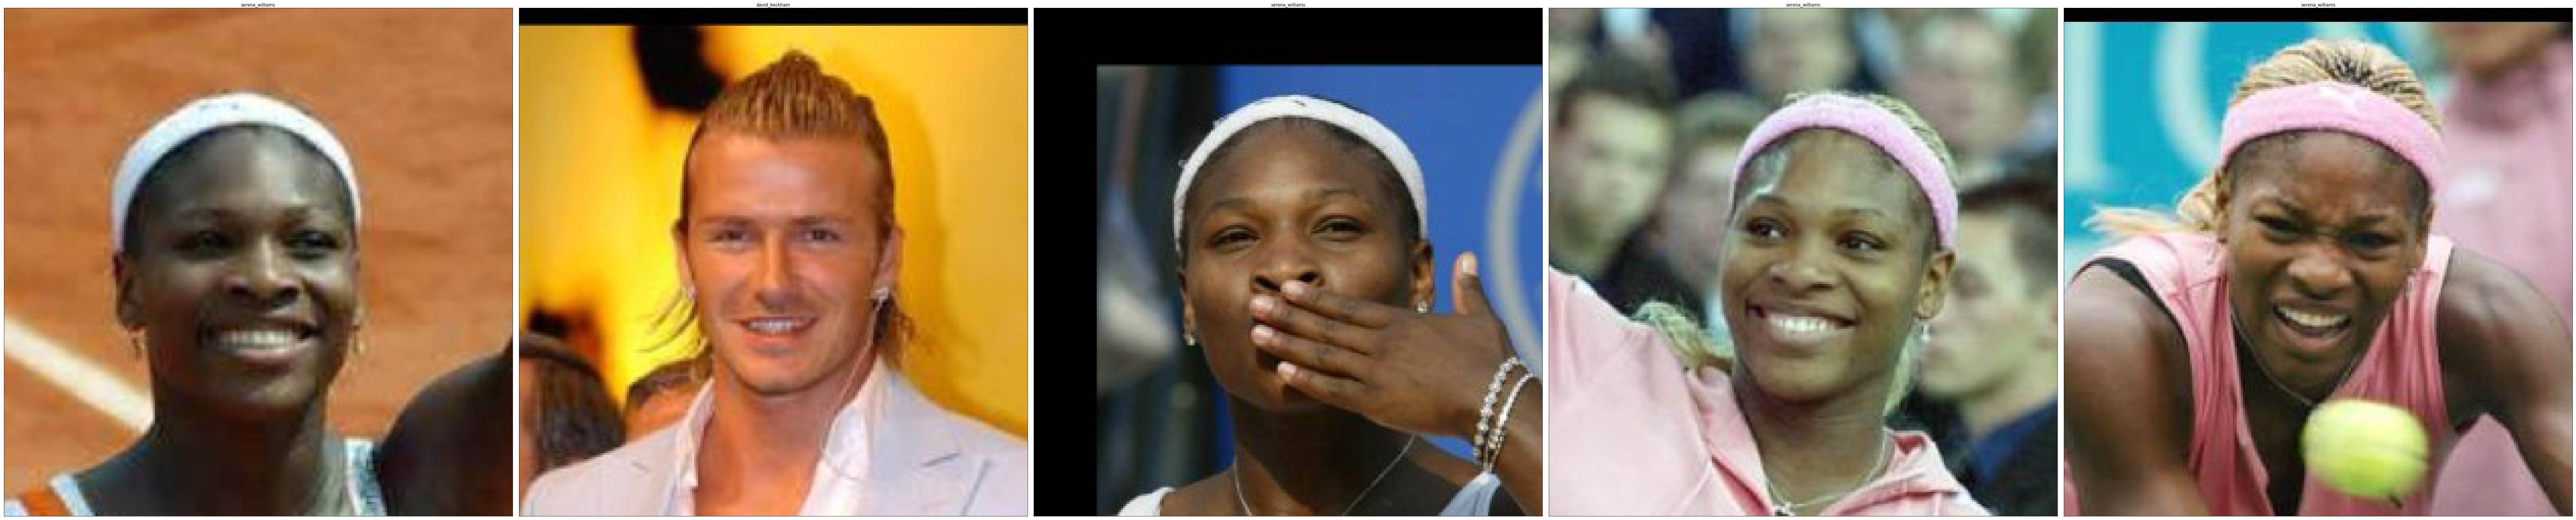

In [32]:
images, labels = get_samples(X, y)
show_side_by_side(images, figsize=(100,100), labels=labels) 

### Let's split our data into training and testing data

Obvioulsy, to do this properly we'd use more than just one person as this is going to overfit

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Let's view our train and testing data

In [34]:
[d for d in zip(X_train, y_train)]

[('../lfw/serena_williams/Serena_Williams_0024.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0047.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0004.jpg', 'serena_williams'),
 ('../lfw/david_beckham/David_Beckham_0010.jpg', 'david_beckham'),
 ('../lfw/serena_williams/Serena_Williams_0041.jpg', 'serena_williams'),
 ('../lfw/david_beckham/David_Beckham_0015.jpg', 'david_beckham'),
 ('../lfw/serena_williams/Serena_Williams_0003.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0013.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0027.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0014.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0051.jpg', 'serena_williams'),
 ('../lfw/david_beckham/David_Beckham_0006.jpg', 'david_beckham'),
 ('../lfw/serena_williams/Serena_Williams_0010.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0040.jpg', 'serena_williams

In [35]:
[d for d in zip(X_test, y_test)]

[('../lfw/david_beckham/David_Beckham_0027.jpg', 'david_beckham'),
 ('../lfw/david_beckham/David_Beckham_0002.jpg', 'david_beckham'),
 ('../lfw/david_beckham/David_Beckham_0009.jpg', 'david_beckham'),
 ('../lfw/serena_williams/Serena_Williams_0012.jpg', 'serena_williams'),
 ('../lfw/david_beckham/David_Beckham_0022.jpg', 'david_beckham'),
 ('../lfw/david_beckham/David_Beckham_0030.jpg', 'david_beckham'),
 ('../lfw/david_beckham/David_Beckham_0004.jpg', 'david_beckham'),
 ('../lfw/serena_williams/Serena_Williams_0044.jpg', 'serena_williams'),
 ('../lfw/david_beckham/David_Beckham_0029.jpg', 'david_beckham'),
 ('../lfw/david_beckham/David_Beckham_0011.jpg', 'david_beckham'),
 ('../lfw/serena_williams/Serena_Williams_0016.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0007.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0018.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0005.jpg', 'serena_williams'),
 ('../lfw/serena_williams/

### Now let's train Rekognition by copying our images to the S3 bucket

In [42]:
train(X_train, y_train, bucket_name)

../lfw/serena_williams/Serena_Williams_0024.jpg serena_williams
{'ResponseMetadata': {'RequestId': '601CA01A91A9065B', 'HostId': 'zR+AsN+b3xg9aBsr5QEp4mFrbWpiac/cK//zk9LXwU1pw/wdIcbvyyIsrrMrYbzqMC4Dh6Wu3bI=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'zR+AsN+b3xg9aBsr5QEp4mFrbWpiac/cK//zk9LXwU1pw/wdIcbvyyIsrrMrYbzqMC4Dh6Wu3bI=', 'x-amz-request-id': '601CA01A91A9065B', 'date': 'Mon, 24 Sep 2018 14:32:16 GMT', 'etag': '"5ab491f239ee5a9836e02fd8301a6895"', 'content-length': '0', 'server': 'AmazonS3'}, 'RetryAttempts': 0}, 'ETag': '"5ab491f239ee5a9836e02fd8301a6895"'}
../lfw/serena_williams/Serena_Williams_0047.jpg serena_williams
{'ResponseMetadata': {'RequestId': 'A0589A5F5DB43F65', 'HostId': 'EnNXH9taFGbxEJI6xRD6WAhGMsff068VVxww8PW9kO6mnNHJliLhKFBnYr3iNKWal5EosoZ7gww=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'EnNXH9taFGbxEJI6xRD6WAhGMsff068VVxww8PW9kO6mnNHJliLhKFBnYr3iNKWal5EosoZ7gww=', 'x-amz-request-id': 'A0589A5F5DB43F65', 'date': 'Mon, 24 Sep 2018 14:32:16 G

{'ResponseMetadata': {'RequestId': '0DADDEEA56EEB814', 'HostId': 'P45coNoyqDllB9Dp4iAqIj7/pVry6QBHOf1HWkacztsGkUAQdcBNUDxAAs0SKEa+nN3Xb0TY7qM=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'P45coNoyqDllB9Dp4iAqIj7/pVry6QBHOf1HWkacztsGkUAQdcBNUDxAAs0SKEa+nN3Xb0TY7qM=', 'x-amz-request-id': '0DADDEEA56EEB814', 'date': 'Mon, 24 Sep 2018 14:32:17 GMT', 'etag': '"cb4993d0c75429d0e2da6325a1a0b624"', 'content-length': '0', 'server': 'AmazonS3'}, 'RetryAttempts': 0}, 'ETag': '"cb4993d0c75429d0e2da6325a1a0b624"'}
../lfw/david_beckham/David_Beckham_0014.jpg david_beckham
{'ResponseMetadata': {'RequestId': 'B4CBDCF5B4D1E0DA', 'HostId': 'grRQ/GRwu//0uZUARLjD1F/Lm2TD3h2u56fY4mDvQWbiJUid5N9ZGpTqVFkTl5amye0zFpoX6ng=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'grRQ/GRwu//0uZUARLjD1F/Lm2TD3h2u56fY4mDvQWbiJUid5N9ZGpTqVFkTl5amye0zFpoX6ng=', 'x-amz-request-id': 'B4CBDCF5B4D1E0DA', 'date': 'Mon, 24 Sep 2018 14:32:17 GMT', 'etag': '"2f8852b78f3aad35d9a56c1afcac1622"', 'content-length': '

{'ResponseMetadata': {'RequestId': '3B732C95307A2288', 'HostId': 'zM0m2qFj5IYV0FMguXNTwXASptkplWTk+8ryt1PgaK67d1ZVDjhjnyl8oKtWNujiC8PZA57m80c=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'zM0m2qFj5IYV0FMguXNTwXASptkplWTk+8ryt1PgaK67d1ZVDjhjnyl8oKtWNujiC8PZA57m80c=', 'x-amz-request-id': '3B732C95307A2288', 'date': 'Mon, 24 Sep 2018 14:32:18 GMT', 'etag': '"6c4c886b0510bf2e49e158e1e3f16a50"', 'content-length': '0', 'server': 'AmazonS3'}, 'RetryAttempts': 0}, 'ETag': '"6c4c886b0510bf2e49e158e1e3f16a50"'}
../lfw/serena_williams/Serena_Williams_0011.jpg serena_williams
{'ResponseMetadata': {'RequestId': 'B22FCF8A485EB0C6', 'HostId': 'k4knmp4uSW3s4FFoSeEAoldFyfg+bJ1j/qPbIcklX+kyLb4R6CGfhFdkbHE+3TAJvo5G91a7e9U=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'k4knmp4uSW3s4FFoSeEAoldFyfg+bJ1j/qPbIcklX+kyLb4R6CGfhFdkbHE+3TAJvo5G91a7e9U=', 'x-amz-request-id': 'B22FCF8A485EB0C6', 'date': 'Mon, 24 Sep 2018 14:32:19 GMT', 'etag': '"bc6a27ab9d06849b966c98f95336278c"', 'content-leng

{'ResponseMetadata': {'RequestId': 'D477D284BB3B967B', 'HostId': 'VdzBc22UXjZxi1Ku0GQigKm5SZFHq20uGYy5TeloiPQL2ohqCpruDks8mAaWm3U+ZiMTeM090ZU=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'VdzBc22UXjZxi1Ku0GQigKm5SZFHq20uGYy5TeloiPQL2ohqCpruDks8mAaWm3U+ZiMTeM090ZU=', 'x-amz-request-id': 'D477D284BB3B967B', 'date': 'Mon, 24 Sep 2018 14:32:21 GMT', 'etag': '"4371b75da1c7b3421b4e96bf45a15836"', 'content-length': '0', 'server': 'AmazonS3'}, 'RetryAttempts': 0}, 'ETag': '"4371b75da1c7b3421b4e96bf45a15836"'}
../lfw/david_beckham/David_Beckham_0005.jpg david_beckham
{'ResponseMetadata': {'RequestId': 'B61A03D8B43D1DF2', 'HostId': 'F+EIT4LxBD6Dy/ZkNZbfu+fBpI3BxoTOYapcWnQpQGVLDM+131HtwVnJtsX84fJBgnmafMuhD5Y=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'F+EIT4LxBD6Dy/ZkNZbfu+fBpI3BxoTOYapcWnQpQGVLDM+131HtwVnJtsX84fJBgnmafMuhD5Y=', 'x-amz-request-id': 'B61A03D8B43D1DF2', 'date': 'Mon, 24 Sep 2018 14:32:21 GMT', 'etag': '"c02c9984835ae1d1df5c86b3b7bc8de3"', 'content-length': '

{'ResponseMetadata': {'RequestId': '5F9E9D102CF2FE66', 'HostId': 'l2tuWmoGU8zEi3IxCRICMY1SertA1C/ZT6g3G7vsY9eiJPkydJ+XFxbSMriWzz69gASBKKCMsPE=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'l2tuWmoGU8zEi3IxCRICMY1SertA1C/ZT6g3G7vsY9eiJPkydJ+XFxbSMriWzz69gASBKKCMsPE=', 'x-amz-request-id': '5F9E9D102CF2FE66', 'date': 'Mon, 24 Sep 2018 14:32:24 GMT', 'etag': '"8a225c851dd9c0e3152292c5ad46e0dd"', 'content-length': '0', 'server': 'AmazonS3'}, 'RetryAttempts': 0}, 'ETag': '"8a225c851dd9c0e3152292c5ad46e0dd"'}
../lfw/david_beckham/David_Beckham_0020.jpg david_beckham
{'ResponseMetadata': {'RequestId': 'E9D79D3EC8BDC36B', 'HostId': 'TkdscJWGNzNGsOh/49eoH77OX7OJuDAKzhTDpoaHjoRUDTHYI2Y0/XBvepHwJXsG5iY4PVYMMYE=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'TkdscJWGNzNGsOh/49eoH77OX7OJuDAKzhTDpoaHjoRUDTHYI2Y0/XBvepHwJXsG5iY4PVYMMYE=', 'x-amz-request-id': 'E9D79D3EC8BDC36B', 'date': 'Mon, 24 Sep 2018 14:32:24 GMT', 'etag': '"b4c5c030736d1ce1c978764e04504b1d"', 'content-length': '

### Now let's test Rekognition to see how accurate it is
We'll use our test dataset for this

In [43]:
images, labels = get_samples(np.array(X_test), np.array(y_test))

In [44]:
def show_image(image):
    img = image.squeeze()
    plt.axis("off")
    plt.imshow(img, cmap='gray', interpolation='nearest')  # Manipulation to display image in the correct orientation!
    plt.show() 

Testing image ../lfw/david_beckham/David_Beckham_0027.jpg


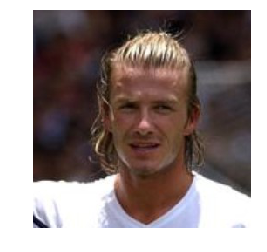

testing image ../lfw/david_beckham/David_Beckham_0027.jpg
Called rekognition...
{'david_beckham'}
Testing image ../lfw/david_beckham/David_Beckham_0002.jpg


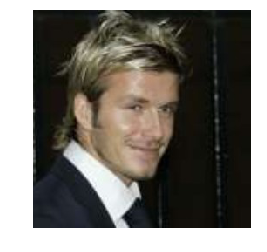

testing image ../lfw/david_beckham/David_Beckham_0002.jpg
Called rekognition...
{'david_beckham'}
Testing image ../lfw/david_beckham/David_Beckham_0009.jpg


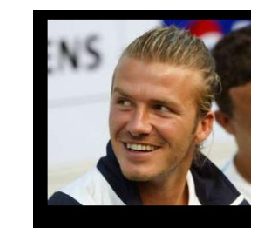

testing image ../lfw/david_beckham/David_Beckham_0009.jpg
Called rekognition...
{'david_beckham'}
Testing image ../lfw/serena_williams/Serena_Williams_0012.jpg


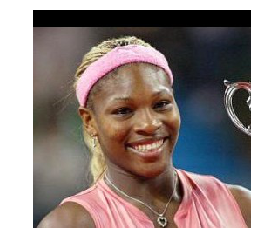

testing image ../lfw/serena_williams/Serena_Williams_0012.jpg
Called rekognition...
{'serena_williams'}
Testing image ../lfw/david_beckham/David_Beckham_0022.jpg


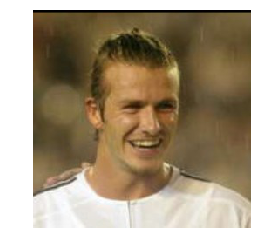

testing image ../lfw/david_beckham/David_Beckham_0022.jpg
Called rekognition...
{'david_beckham'}
Testing image ../lfw/david_beckham/David_Beckham_0030.jpg


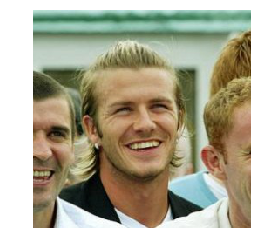

testing image ../lfw/david_beckham/David_Beckham_0030.jpg
Called rekognition...
{'david_beckham'}
Testing image ../lfw/david_beckham/David_Beckham_0004.jpg


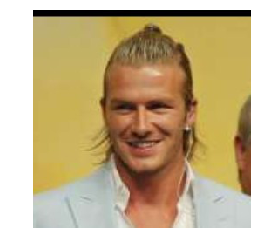

testing image ../lfw/david_beckham/David_Beckham_0004.jpg
Called rekognition...
{'david_beckham'}
Testing image ../lfw/serena_williams/Serena_Williams_0044.jpg


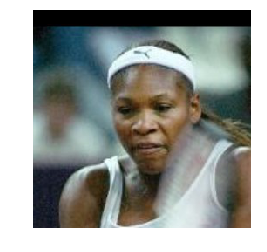

testing image ../lfw/serena_williams/Serena_Williams_0044.jpg
Called rekognition...
{'serena_williams'}
Testing image ../lfw/david_beckham/David_Beckham_0029.jpg


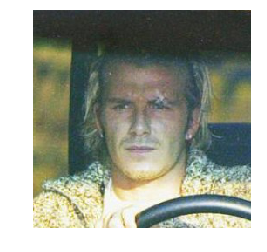

testing image ../lfw/david_beckham/David_Beckham_0029.jpg
Called rekognition...
{'david_beckham'}
Testing image ../lfw/david_beckham/David_Beckham_0011.jpg


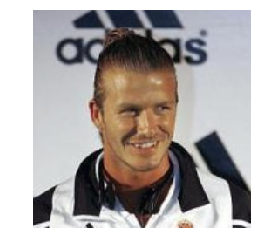

testing image ../lfw/david_beckham/David_Beckham_0011.jpg
Called rekognition...
{'david_beckham'}
Testing image ../lfw/serena_williams/Serena_Williams_0016.jpg


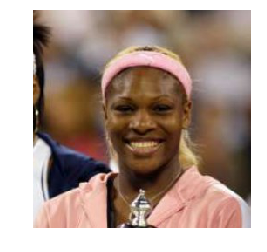

testing image ../lfw/serena_williams/Serena_Williams_0016.jpg
Called rekognition...
{'serena_williams'}
Testing image ../lfw/serena_williams/Serena_Williams_0007.jpg


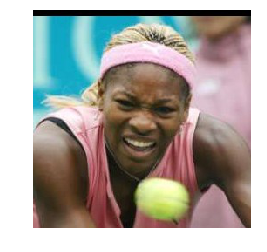

testing image ../lfw/serena_williams/Serena_Williams_0007.jpg
Called rekognition...
{'serena_williams'}
Testing image ../lfw/serena_williams/Serena_Williams_0018.jpg


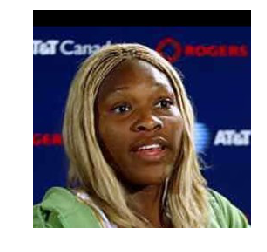

testing image ../lfw/serena_williams/Serena_Williams_0018.jpg
Called rekognition...
{'serena_williams'}
Testing image ../lfw/serena_williams/Serena_Williams_0005.jpg


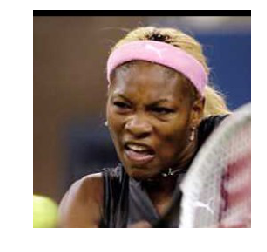

testing image ../lfw/serena_williams/Serena_Williams_0005.jpg
Called rekognition...
{'serena_williams'}
Testing image ../lfw/serena_williams/Serena_Williams_0019.jpg


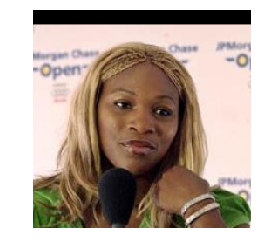

testing image ../lfw/serena_williams/Serena_Williams_0019.jpg
Called rekognition...
{'serena_williams'}
Testing image ../lfw/serena_williams/Serena_Williams_0029.jpg


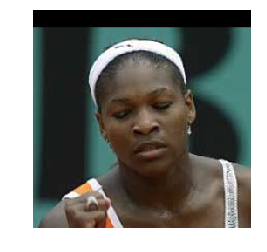

testing image ../lfw/serena_williams/Serena_Williams_0029.jpg
Called rekognition...
{'serena_williams'}
Testing image ../lfw/serena_williams/Serena_Williams_0035.jpg


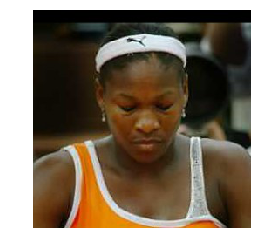

testing image ../lfw/serena_williams/Serena_Williams_0035.jpg
Called rekognition...
{'serena_williams'}


In [52]:
for image, label in zip(X_test, y_test):
    print('Testing image {}'.format(image))
    img = load_image_as_array(image)
    show_image(img) 
    inferred = test(image)
    print(inferred)